<h1><center>Speech Emotion Recognition</center></h1>

In [1]:
import librosa
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
dataset_path = 'D://archive//audio_speech_actors_01-24//'

In [3]:
# Function to extract features from each audio file
def extract_features(file_path):
    audio, sampling_rate = librosa.load(file_path, sr=22050, duration=None)
    mfccs = librosa.feature.mfcc(y=audio, sr=sampling_rate, n_mfcc=30)
    features = np.mean(mfccs.T, axis=0)
    return features

# Function to extract features from each audio file without silent moments
def extract_features_trim(file_path):
    audio, sampling_rate = librosa.load(file_path, sr=22050, duration=None)
    audio, index = librosa.effects.trim(audio, top_db=20, frame_length=512, hop_length=256)
    mfccs = librosa.feature.mfcc(y=audio, sr=sampling_rate, n_mfcc=30)
    features = np.mean(mfccs.T, axis=0)
    return features

# Function to preprocess the data
def preprocess_data(dataset_path):
    X = []
    y = []
    for folder in os.listdir(dataset_path):
        for file in os.listdir(os.path.join(dataset_path, folder)):
            if file.endswith('.wav'):
                
                emotion = file.split('-')[2]
                if int(emotion) == 1:
                    label = 'Neutral'
                elif int(emotion) == 2:
                    label = 'Calm'
                elif int(emotion) == 3:
                    label = 'Happy'
                elif int(emotion) == 4:
                    label = 'Sad'
                elif int(emotion) == 5:
                    label = 'Angry'
                elif int(emotion) == 6:
                    label = 'Fearful'
                elif int(emotion) == 7:
                    label = 'Disgust'
                elif int(emotion) == 8:
                    label = 'Surprised'
                else:
                    label = 'UNK'
                    
                file_path = os.path.join(dataset_path, folder, file)
                features = extract_features(file_path)
                X.append(features)
                y.append(label)
    return np.array(X), np.array(y)

# Function for displaying confusion matrix plot
def plot_confusion_matrix(y_true, y_pred, classes, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 3))
    sns.set(font_scale=1.2)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix For {}'.format(title))
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

In [4]:
# Preprocess the data
X, y = preprocess_data(dataset_path)

# Print the shape of the feature matrix and the label array
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (1440, 30)
Shape of y: (1440,)


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


<h3>Supervised Machine Learning Models</h3>
- Support Vector Machine


In [6]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Train SVM model
svm = SVC(kernel='linear', gamma='auto')
svm.fit(X_train, y_train)

# Predict on test set
y_pred = svm.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Angry       0.53      0.74      0.62        34
        Calm       0.48      0.68      0.56        40
     Disgust       0.53      0.38      0.44        45
     Fearful       0.41      0.48      0.44        31
       Happy       0.52      0.39      0.44        41
     Neutral       0.29      0.21      0.24        19
         Sad       0.39      0.34      0.36        35
   Surprised       0.47      0.44      0.46        43

    accuracy                           0.47       288
   macro avg       0.45      0.46      0.45       288
weighted avg       0.47      0.47      0.46       288



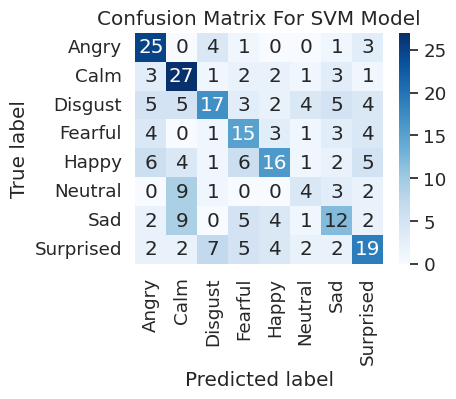

In [7]:
plot_confusion_matrix(y_test, y_pred, np.unique(y_test), 'SVM Model')

- K Nearest Neighbor

In [8]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)

# Predict on test set
y_pred = knn.predict(X_test)

# Print classification report


              precision    recall  f1-score   support

       Angry       0.38      0.76      0.50        34
        Calm       0.44      0.72      0.55        40
     Disgust       0.32      0.20      0.25        45
     Fearful       0.36      0.39      0.38        31
       Happy       0.46      0.32      0.38        41
     Neutral       0.23      0.32      0.27        19
         Sad       0.43      0.17      0.24        35
   Surprised       0.33      0.19      0.24        43

    accuracy                           0.38       288
   macro avg       0.37      0.38      0.35       288
weighted avg       0.38      0.38      0.35       288



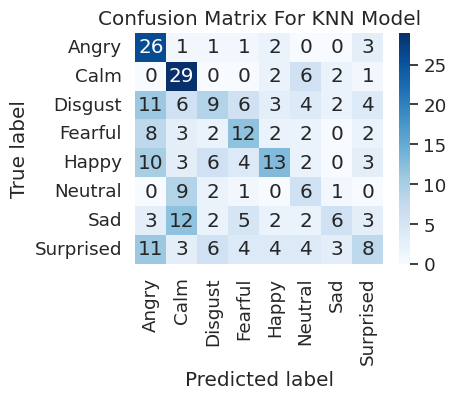

In [9]:
plot_confusion_matrix(y_test, y_pred, np.unique(y_test), 'KNN Model')

- Decision Tree

In [10]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree model
dt = DecisionTreeClassifier(random_state=29)
dt.fit(X_train, y_train)

# Predict on test set
y_pred = dt.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Angry       0.59      0.76      0.67        34
        Calm       0.53      0.50      0.51        40
     Disgust       0.54      0.29      0.38        45
     Fearful       0.38      0.48      0.42        31
       Happy       0.41      0.27      0.32        41
     Neutral       0.26      0.42      0.32        19
         Sad       0.33      0.37      0.35        35
   Surprised       0.50      0.51      0.51        43

    accuracy                           0.44       288
   macro avg       0.44      0.45      0.43       288
weighted avg       0.46      0.44      0.44       288



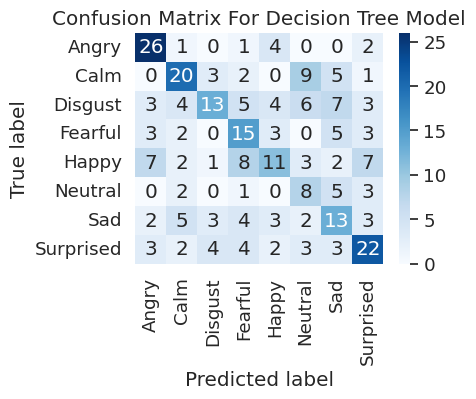

In [11]:
plot_confusion_matrix(y_test, y_pred, np.unique(y_test), 'Decision Tree Model')

- Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)

# Predict on test set
y_pred = rf.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Angry       0.77      0.71      0.74        34
        Calm       0.55      0.90      0.69        40
     Disgust       0.61      0.51      0.55        45
     Fearful       0.56      0.71      0.63        31
       Happy       0.76      0.54      0.63        41
     Neutral       0.60      0.32      0.41        19
         Sad       0.47      0.46      0.46        35
   Surprised       0.71      0.70      0.71        43

    accuracy                           0.62       288
   macro avg       0.63      0.60      0.60       288
weighted avg       0.64      0.62      0.62       288



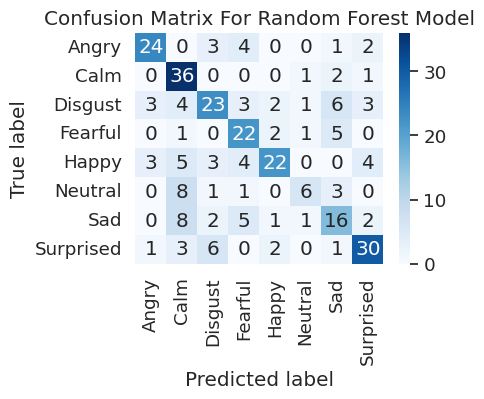

In [13]:
plot_confusion_matrix(y_test, y_pred, np.unique(y_test), 'Random Forest Model')

As we can see, the best results of  Supervised machine learning models are:
- Random Forest => 62%
- Support Vector Machine => 46%

Here ,we are developing Ensemble learning model using Randomforest,SVM,DecisionTree

In [14]:
m1=RandomForestClassifier()
m2=SVC()
m3=DecisionTreeClassifier()

In [15]:
from sklearn.ensemble import VotingClassifier
from sklearn.multioutput import MultiOutputClassifier
model5=VotingClassifier([('md2',m1),('m2trim',m2),('m3trim',m3)])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
model5.fit(X_train,y_train)
from sklearn.metrics import accuracy_score
model5.score(X_train,y_train)

1.0

In [16]:
model5.score(X_test,y_test)

0.4965277777777778

**CNN model**

In [17]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [18]:
OHE = OneHotEncoder()

y = np.array(y).reshape(-1,1)
y = OHE.fit_transform(y).toarray()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=29,
                                                    test_size=0.25,
                                                    shuffle=True)

print('X_train: {}'.format(X_train.shape))
print('y_train: {}'.format(y_train.shape))
print('X_test: {}'.format(X_test.shape))
print('y_test: {}'.format(y_test.shape))

X_train: (1080, 30)
y_train: (1080, 8)
X_test: (360, 30)
y_test: (360, 8)


In [20]:
SS = StandardScaler()

X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)

In [21]:
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

print('X_train: {}'.format(X_train.shape))
print('X_test: {}'.format(X_test.shape))

X_train: (1080, 30, 1)
X_test: (360, 30, 1)


In [22]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=20)

# Function to plot Training Accuracy vs Validation Accuracy
def TrainVal_plot(history):
    val_acc = history.history['val_accuracy']
    train_acc = history.history['accuracy']

    epochs = range(1, early_stop.stopped_epoch+2)
    plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
    plt.plot(epochs, train_acc, 'r', label='Training Accuracy')
    plt.title('Training vs. Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

In [23]:
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Define input shape
input_shape = (X_train.shape[1], 1)

# Create model
model = Sequential()


model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))

model.add(Flatten())

model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=8, activation='softmax'))

# Compile model with appropriate loss function, optimizer and metrics
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 28, 32)            128       
                                                                 
 conv1d_1 (Conv1D)           (None, 26, 64)            6208      
                                                                 
 conv1d_2 (Conv1D)           (None, 24, 128)           24704     
                                                                 
 conv1d_3 (Conv1D)           (None, 22, 256)           98560     
                                                                 
 flatten (Flatten)           (None, 5632)              0         
                                                                 
 dense (Dense)               (None, 128)               721024    
                                                                 
 dropout (Dropout)           (None, 128)               0

In [24]:
history = model.fit(X_train,
                        y_train,
                        batch_size=32,
                        epochs=300,
                        validation_data=(X_test, y_test),
                       callbacks=[early_stop])

Epoch 1/300
34/34 [==============================] - 3s 29ms/step - loss: 1.9791 - accuracy: 0.2065 - val_loss: 1.8113 - val_accuracy: 0.2972
Epoch 2/300
34/34 [==============================] - 1s 22ms/step - loss: 1.7313 - accuracy: 0.3500 - val_loss: 1.6385 - val_accuracy: 0.3806
Epoch 3/300
34/34 [==============================] - 1s 20ms/step - loss: 1.5520 - accuracy: 0.4185 - val_loss: 1.4703 - val_accuracy: 0.4667
Epoch 4/300
34/34 [==============================] - 1s 22ms/step - loss: 1.3329 - accuracy: 0.5120 - val_loss: 1.3793 - val_accuracy: 0.5194
Epoch 5/300
34/34 [==============================] - 1s 23ms/step - loss: 1.1246 - accuracy: 0.5944 - val_loss: 1.2474 - val_accuracy: 0.5389
Epoch 6/300
34/34 [==============================] - 1s 20ms/step - loss: 0.9579 - accuracy: 0.6704 - val_loss: 1.2092 - val_accuracy: 0.5556
Epoch 7/300
34/34 [==============================] - 1s 24ms/step - loss: 0.7997 - accuracy: 0.7139 - val_loss: 1.1868 - val_accuracy: 0.5639
Epoch 

In [25]:
print("Accuracy of our model on test data : " , round(model.evaluate(X_test,y_test)[1]*100,2) , "%")


12/12 [==============================] - 0s 7ms/step - loss: 1.8026 - accuracy: 0.6222
Accuracy of our model on test data :  62.22 %


In [26]:
print("Accuracy of our model on Train data : " , round(model.evaluate(X_train,y_train)[1]*100,2) , "%")



34/34 [==============================] - 0s 7ms/step - loss: 0.0069 - accuracy: 0.9981
Accuracy of our model on Train data :  99.81 %


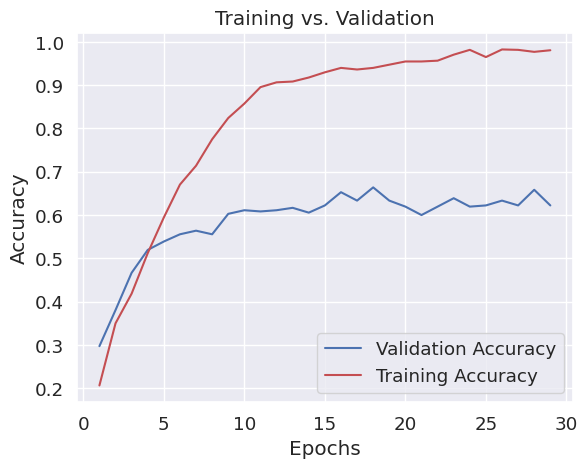

In [27]:
TrainVal_plot(history)

In [28]:
model2 = Sequential()

model2.add(Conv1D(filters=32, kernel_size=5, activation='relu', input_shape=input_shape))
model2.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model2.add(Dropout(0.7))
model2.add(Conv1D(filters=64, kernel_size=5, activation='relu'))

model2.add(Flatten())

model2.add(Dense(units=128, activation='relu'))
model2.add(Dropout(0.6))

model2.add(Dense(units=8, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 26, 32)            192       
                                                                 
 conv1d_5 (Conv1D)           (None, 22, 64)            10304     
                                                                 
 dropout_1 (Dropout)         (None, 22, 64)            0         
                                                                 
 conv1d_6 (Conv1D)           (None, 18, 64)            20544     
                                                                 
 flatten_1 (Flatten)         (None, 1152)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               147584    
                                                                 
 dropout_2 (Dropout)         (None, 128)              

In [29]:
history = model2.fit(X_train,
                        y_train,
                        batch_size=32,
                        epochs=300,
                        validation_data=(X_test, y_test),
                        callbacks=[early_stop])

Epoch 1/300
34/34 [==============================] - 2s 17ms/step - loss: 2.0760 - accuracy: 0.1324 - val_loss: 2.0187 - val_accuracy: 0.2278
Epoch 2/300
34/34 [==============================] - 0s 12ms/step - loss: 2.0070 - accuracy: 0.1861 - val_loss: 1.9521 - val_accuracy: 0.2750
Epoch 3/300
34/34 [==============================] - 0s 11ms/step - loss: 1.9805 - accuracy: 0.2120 - val_loss: 1.9368 - val_accuracy: 0.2861
Epoch 4/300
34/34 [==============================] - 0s 12ms/step - loss: 1.9501 - accuracy: 0.2185 - val_loss: 1.8852 - val_accuracy: 0.2750
Epoch 5/300
34/34 [==============================] - 0s 11ms/step - loss: 1.9154 - accuracy: 0.2463 - val_loss: 1.8521 - val_accuracy: 0.3000
Epoch 6/300
34/34 [==============================] - 0s 12ms/step - loss: 1.8690 - accuracy: 0.2769 - val_loss: 1.8157 - val_accuracy: 0.3361
Epoch 7/300
34/34 [==============================] - 0s 11ms/step - loss: 1.8215 - accuracy: 0.2926 - val_loss: 1.7490 - val_accuracy: 0.3306
Epoch 

In [30]:
print("Accuracy of our model on test data : " , round(model2.evaluate(X_test,y_test)[1]*100,2) , "%")


12/12 [==============================] - 0s 5ms/step - loss: 1.0245 - accuracy: 0.6556
Accuracy of our model on test data :  65.56 %


In [31]:
print("Accuracy of our model on Train data : " , round(model2.evaluate(X_train,y_train)[1]*100,2) , "%")



34/34 [==============================] - 0s 4ms/step - loss: 0.1277 - accuracy: 0.9824
Accuracy of our model on Train data :  98.24 %


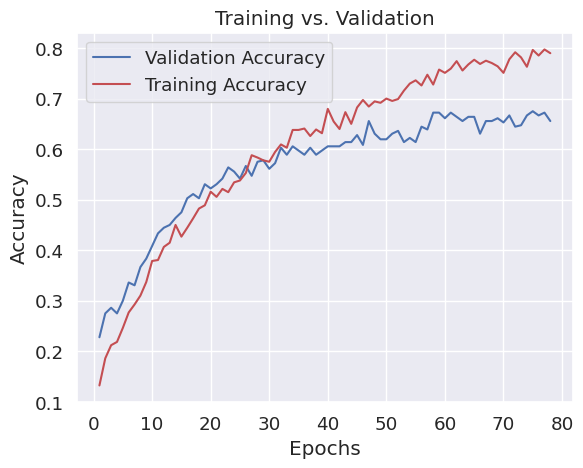

In [32]:
TrainVal_plot(history)

In [33]:
model3 = Sequential()

model3.add(Conv1D(filters=32, kernel_size=7, activation='relu', input_shape=input_shape))
model3.add(Conv1D(filters=32, kernel_size=7, activation='relu'))
model3.add(Dropout(0.7))
model3.add(Conv1D(filters=64, kernel_size=7, activation='relu'))

model3.add(Flatten())

model3.add(Dense(units=128, activation='relu'))
model3.add(Dropout(0.6))

model3.add(Dense(units=8, activation='softmax'))

model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_7 (Conv1D)           (None, 24, 32)            256       
                                                                 
 conv1d_8 (Conv1D)           (None, 18, 32)            7200      
                                                                 
 dropout_3 (Dropout)         (None, 18, 32)            0         
                                                                 
 conv1d_9 (Conv1D)           (None, 12, 64)            14400     
                                                                 
 flatten_2 (Flatten)         (None, 768)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               98432     
                                                                 
 dropout_4 (Dropout)         (None, 128)              

In [34]:
history = model3.fit(X_train,
                        y_train,
                        batch_size=32,
                        epochs=300,
                        validation_data=(X_test, y_test), 
                        callbacks=[early_stop])

Epoch 1/300
34/34 [==============================] - 2s 27ms/step - loss: 2.0761 - accuracy: 0.1269 - val_loss: 2.0290 - val_accuracy: 0.2222
Epoch 2/300
34/34 [==============================] - 0s 10ms/step - loss: 2.0089 - accuracy: 0.1944 - val_loss: 1.9935 - val_accuracy: 0.2250
Epoch 3/300
34/34 [==============================] - 0s 11ms/step - loss: 2.0063 - accuracy: 0.1963 - val_loss: 1.9748 - val_accuracy: 0.2806
Epoch 4/300
34/34 [==============================] - 0s 10ms/step - loss: 1.9693 - accuracy: 0.2102 - val_loss: 1.9159 - val_accuracy: 0.2500
Epoch 5/300
34/34 [==============================] - 0s 10ms/step - loss: 1.9540 - accuracy: 0.2167 - val_loss: 1.8852 - val_accuracy: 0.2917
Epoch 6/300
34/34 [==============================] - 0s 9ms/step - loss: 1.9193 - accuracy: 0.2463 - val_loss: 1.8597 - val_accuracy: 0.3139
Epoch 7/300
34/34 [==============================] - 0s 10ms/step - loss: 1.8744 - accuracy: 0.2713 - val_loss: 1.7889 - val_accuracy: 0.3556
Epoch 8

In [35]:
print("Accuracy of our model on test data : " , round(model3.evaluate(X_test,y_test)[1]*100,2) , "%")


12/12 [==============================] - 0s 4ms/step - loss: 1.0597 - accuracy: 0.6472
Accuracy of our model on test data :  64.72 %


In [36]:
print("Accuracy of our model on Train data : " , round(model3.evaluate(X_train,y_train)[1]*100,2) , "%")



34/34 [==============================] - 0s 4ms/step - loss: 0.2237 - accuracy: 0.9602
Accuracy of our model on Train data :  96.02 %


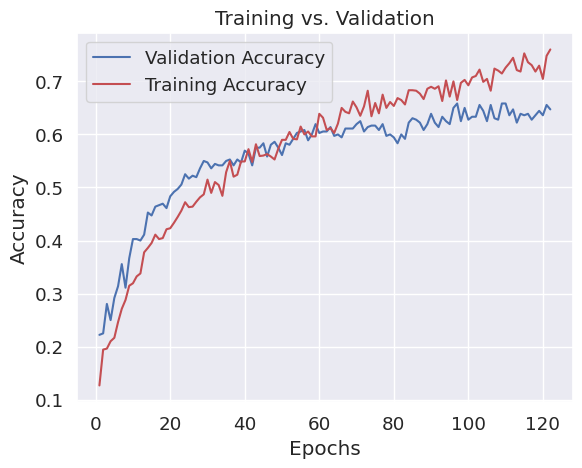

In [37]:
TrainVal_plot(history)

i'll try preprocessing for audio data using <b>Trim audio technique</b>

In [38]:
# Function to preprocess the data
def preprocess_data(dataset_path):
    X = []
    y = []
    for folder in os.listdir(dataset_path):
        for file in os.listdir(os.path.join(dataset_path, folder)):
            if file.endswith('.wav'):
                
                emotion = file.split('-')[2]
                if int(emotion) == 1:
                    label = 'Neutral'
                elif int(emotion) == 2:
                    label = 'Calm'
                elif int(emotion) == 3:
                    label = 'Happy'
                elif int(emotion) == 4:
                    label = 'Sad'
                elif int(emotion) == 5:
                    label = 'Angry'
                elif int(emotion) == 6:
                    label = 'Fearful'
                elif int(emotion) == 7:
                    label = 'Disgust'
                elif int(emotion) == 8:
                    label = 'Surprised'
                else:
                    label = 'UNK'
                    
                file_path = os.path.join(dataset_path, folder, file)
                features = extract_features_trim(file_path)
                X.append(features)
                y.append(label)
    return np.array(X), np.array(y)

In [39]:
# Preprocess the data
X, y = preprocess_data(dataset_path)

# Print the shape of the feature matrix and the label array
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (1440, 30)
Shape of y: (1440,)


In [40]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

OHE = OneHotEncoder()
SS = StandardScaler()

y = np.array(y).reshape(-1,1)
y = OHE.fit_transform(y).toarray()

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=29,
                                                    test_size=0.25,
                                                    shuffle=True)

X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)

X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

print('X_train: {}'.format(X_train.shape))
print('X_test: {}'.format(X_test.shape))

X_train: (1080, 30, 1)
X_test: (360, 30, 1)


In [41]:
model2_trim = Sequential()

model2_trim.add(Conv1D(filters=32, kernel_size=5, activation='relu', input_shape=input_shape))
model2_trim.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
model2_trim.add(Dropout(0.7))
model2_trim.add(Conv1D(filters=64, kernel_size=5, activation='relu'))

model2_trim.add(Flatten())

model2_trim.add(Dense(units=128, activation='relu'))
model2_trim.add(Dropout(0.6))

model2_trim.add(Dense(units=8, activation='softmax'))

model2_trim.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model2_trim.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 26, 32)            192       
                                                                 
 conv1d_11 (Conv1D)          (None, 22, 64)            10304     
                                                                 
 dropout_5 (Dropout)         (None, 22, 64)            0         
                                                                 
 conv1d_12 (Conv1D)          (None, 18, 64)            20544     
                                                                 
 flatten_3 (Flatten)         (None, 1152)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               147584    
                                                                 
 dropout_6 (Dropout)         (None, 128)              

In [42]:
history = model2_trim.fit(X_train,
                        y_train,
                        batch_size=32,
                        epochs=300,
                        validation_data=(X_test, y_test),
                        callbacks=[early_stop])

Epoch 1/300
34/34 [==============================] - 2s 16ms/step - loss: 2.0549 - accuracy: 0.1574 - val_loss: 2.0051 - val_accuracy: 0.2667
Epoch 2/300
34/34 [==============================] - 0s 11ms/step - loss: 1.9861 - accuracy: 0.1963 - val_loss: 1.9181 - val_accuracy: 0.2861
Epoch 3/300
34/34 [==============================] - 0s 12ms/step - loss: 1.9434 - accuracy: 0.2278 - val_loss: 1.8880 - val_accuracy: 0.3111
Epoch 4/300
34/34 [==============================] - 0s 12ms/step - loss: 1.8878 - accuracy: 0.2787 - val_loss: 1.7906 - val_accuracy: 0.3278
Epoch 5/300
34/34 [==============================] - 0s 12ms/step - loss: 1.8470 - accuracy: 0.2898 - val_loss: 1.7419 - val_accuracy: 0.3306
Epoch 6/300
34/34 [==============================] - 0s 11ms/step - loss: 1.7605 - accuracy: 0.3361 - val_loss: 1.6826 - val_accuracy: 0.3611
Epoch 7/300
34/34 [==============================] - 0s 12ms/step - loss: 1.7073 - accuracy: 0.3454 - val_loss: 1.6737 - val_accuracy: 0.3583
Epoch 

In [43]:
print("Accuracy of our model on test data : " , round(model2_trim.evaluate(X_test,y_test)[1]*100,2) , "%")


12/12 [==============================] - 0s 4ms/step - loss: 0.9654 - accuracy: 0.6889
Accuracy of our model on test data :  68.89 %


In [44]:
print("Accuracy of our model on Train data : " , round(model2_trim.evaluate(X_train,y_train)[1]*100,2) , "%")



34/34 [==============================] - 0s 4ms/step - loss: 0.1627 - accuracy: 0.9750
Accuracy of our model on Train data :  97.5 %


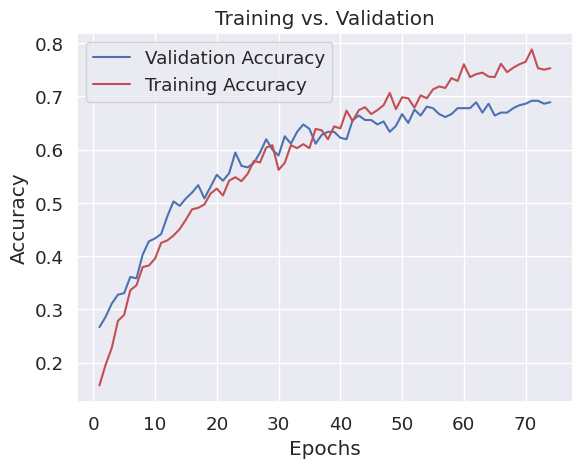

In [45]:
TrainVal_plot(history)

In [46]:
model3_trim = Sequential()

model3_trim.add(Conv1D(filters=32, kernel_size=7, activation='relu', input_shape=input_shape))
model3_trim.add(Conv1D(filters=32, kernel_size=7, activation='relu'))
model3_trim.add(Dropout(0.7))
model3_trim.add(Conv1D(filters=64, kernel_size=7, activation='relu'))

model3_trim.add(Flatten())

model3_trim.add(Dense(units=128, activation='relu'))
model3_trim.add(Dropout(0.6))

model3_trim.add(Dense(units=8, activation='softmax'))

model3_trim.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model3_trim.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_13 (Conv1D)          (None, 24, 32)            256       
                                                                 
 conv1d_14 (Conv1D)          (None, 18, 32)            7200      
                                                                 
 dropout_7 (Dropout)         (None, 18, 32)            0         
                                                                 
 conv1d_15 (Conv1D)          (None, 12, 64)            14400     
                                                                 
 flatten_4 (Flatten)         (None, 768)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               98432     
                                                                 
 dropout_8 (Dropout)         (None, 128)              

In [47]:
history = model3_trim.fit(X_train,
                        y_train,
                        batch_size=32,
                        epochs=300,
                        validation_data=(X_test, y_test),
                        callbacks=[early_stop])

Epoch 1/300
34/34 [==============================] - 2s 14ms/step - loss: 2.0805 - accuracy: 0.1315 - val_loss: 2.0290 - val_accuracy: 0.1944
Epoch 2/300
34/34 [==============================] - 0s 9ms/step - loss: 2.0330 - accuracy: 0.1398 - val_loss: 1.9912 - val_accuracy: 0.2889
Epoch 3/300
34/34 [==============================] - 0s 10ms/step - loss: 1.9865 - accuracy: 0.1981 - val_loss: 1.9262 - val_accuracy: 0.2944
Epoch 4/300
34/34 [==============================] - 0s 9ms/step - loss: 1.9562 - accuracy: 0.2481 - val_loss: 1.9054 - val_accuracy: 0.2806
Epoch 5/300
34/34 [==============================] - 0s 10ms/step - loss: 1.9302 - accuracy: 0.2352 - val_loss: 1.8705 - val_accuracy: 0.3167
Epoch 6/300
34/34 [==============================] - 0s 9ms/step - loss: 1.8943 - accuracy: 0.2787 - val_loss: 1.8183 - val_accuracy: 0.3361
Epoch 7/300
34/34 [==============================] - 0s 9ms/step - loss: 1.8607 - accuracy: 0.2750 - val_loss: 1.7701 - val_accuracy: 0.3333
Epoch 8/30

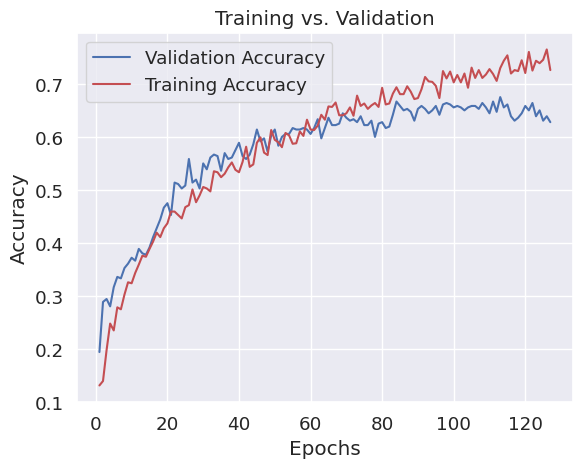

In [48]:
TrainVal_plot(history)

In [49]:
print("Accuracy of our model on test data : " , round(model3_trim.evaluate(X_test,y_test)[1]*100,2) , "%")



12/12 [==============================] - 0s 4ms/step - loss: 1.0632 - accuracy: 0.6278
Accuracy of our model on test data :  62.78 %


In [50]:
print("Accuracy of our model on Train data : " , round(model3_trim.evaluate(X_train,y_train)[1]*100,2) , "%")



34/34 [==============================] - 0s 4ms/step - loss: 0.2335 - accuracy: 0.9602
Accuracy of our model on Train data :  96.02 %
